In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
import altair as alt
import ggplot as gg
import folium

# Loading the dataset
df = pd.read_csv('/kaggle/input/linkedin-data-engineer-job-postings/postings.csv')

# Displaying the first few rows of the dataset
df.head()


,job_title,company,job_location,job_link,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills
0,Data Engineer 2,Cook Medical,"Bloomington, IN",https://www.linkedin.com/jobs/view/data-engine...,2023-12-17,Bloomington,United States,Mid senior,Onsite,"Overview\nThe Data Engineer develops, implemen...","Azure, SQL, NoSQL, SQL Server, Oracle, MongoDB..."
1,Staff Data Engineer,Recruiting from Scratch,"Bloomington, IN",https://www.linkedin.com/jobs/view/staff-data-...,2023-12-17,Bloomington,United States,Mid senior,Onsite,This is for a client of Recruiting from Scratc...,"Python, Snowflake, Airflow, Kubernetes, Docker..."
2,"Senior Data Engineer, Public Company",Recruiting from Scratch,"Bloomington, IN",https://www.linkedin.com/jobs/view/senior-data...,2023-12-17,Bloomington,United States,Mid senior,Onsite,This is for a client of Recruiting from Scratc...,"Python, SQL, Snowflake, Airflow, Kubernetes, D..."
3,"Senior Data Engineer, Public Company",Recruiting from Scratch,"Bloomington, IN",https://www.linkedin.com/jobs/view/senior-data...,2023-12-17,Bloomington,United States,Mid senior,Onsite,This is for a client of Recruiting from Scratc...,"TDD, Automation, Continuous delivery, Data eng..."
4,"Senior Systems Engineer, Azure Data Platform",Cook Medical,"Bloomington, IN",https://www.linkedin.com/jobs/view/senior-syst...,2023-12-17,Bloomington,United States,Mid senior,Hybrid,Overview\nWe are seeking a talented Azure Clou...,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6025 entries, 0 to 6024
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   job_title       6025 non-null   object
 1   company         6025 non-null   object
 2   job_location    6025 non-null   object
 3   job_link        6025 non-null   object
 4   first_seen      6025 non-null   object
 5   search_city     6025 non-null   object
 6   search_country  6025 non-null   object
 7   job level       6025 non-null   object
 8   job_type        6025 non-null   object
 9   job_summary     5665 non-null   object
 10  job_skills      4960 non-null   object
dtypes: object(11)
memory usage: 517.9+ KB


In [3]:
# Checking for missing values
missing_values = df.isnull().sum()

# Displaying the count of missing values in each column
missing_values

job_title            0
company              0
job_location         0
job_link             0
first_seen           0
search_city          0
search_country       0
job level            0
job_type             0
job_summary        360
job_skills        1065
dtype: int64

In [4]:
df.describe()

,job_title,company,job_location,job_link,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills
count,6025,6025,6025,6025,6025,6025,6025,6025,6025,5665,4960
unique,2566,2565,1296,6025,1,667,4,2,3,4492,4941
top,Senior Data Engineer,Recruiting from Scratch,United States,https://www.linkedin.com/jobs/view/data-engine...,2023-12-17,Greater London,United States,Mid senior,Onsite,Who is Recruiting from Scratch :\nRecruiting f...,"Databricks, SQL, Python, PySpark, Azure Data F..."
freq,537,341,204,1,6025,107,4031,5076,2817,81,7


**How many unique job titles, companies, and job types are there in the dataset?**

In [5]:
# Counting unique values for job titles, companies, and job types
unique_job_titles = df['job_title'].nunique()
unique_companies = df['company'].nunique()
unique_job_types = df['job_type'].nunique()

# Displaying the counts
unique_job_titles, unique_companies, unique_job_types


(2566, 2565, 3)

**What are the most common job titles and job types in the dataset?**

In [6]:
# Finding the most common job titles and job types
common_job_titles = df['job_title'].value_counts().head(10)
common_job_types = df['job_type'].value_counts()

# Displaying the results
common_job_titles, common_job_types


(job_title
 Senior Data Engineer                    537
 Data Engineer                           449
 Data Analyst                            187
 Senior Staff AI Data Engineer           150
 Senior Data Engineer, Public Company    119
 Senior Data Analyst                     103
 Staff Data Engineer                      97
 Lead Data Engineer                       86
 Sr. Data Engineer                        69
 Data Scientist                           64
 Name: count, dtype: int64,
 job_type
 Onsite    2817
 Hybrid    2061
 Remote    1147
 Name: count, dtype: int64)

**What are the top skills mentioned in the job postings?**

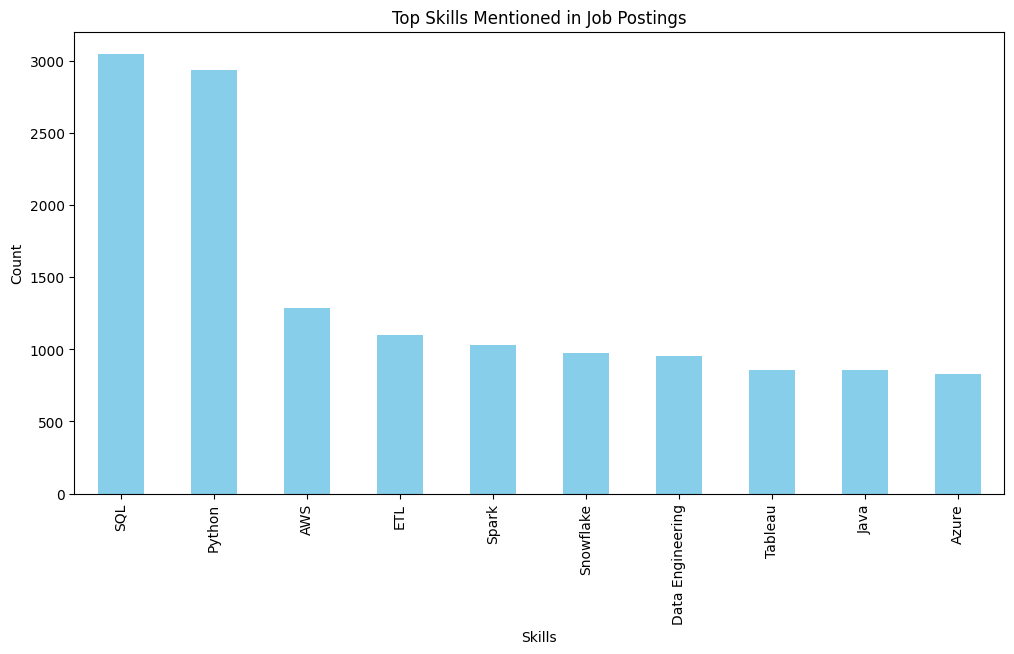

In [7]:
# Extracting and counting skills from job_skills column
skills_series = df['job_skills'].str.split(',').explode().str.strip()
top_skills = skills_series.value_counts().head(10)

# Plotting the top skills
plt.figure(figsize=(12, 6))
top_skills.plot(kind='bar', color='skyblue')
plt.title('Top Skills Mentioned in Job Postings')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.show()


**What is the distribution of job types in the dataset?**

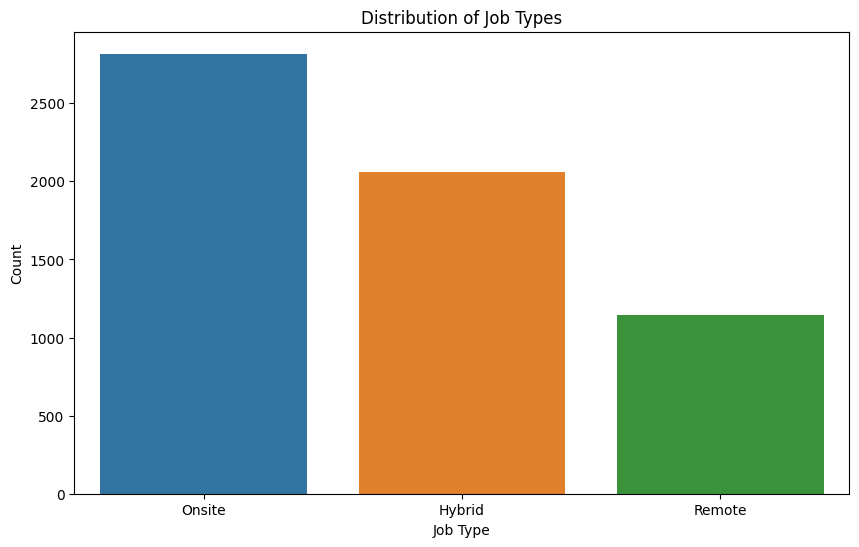

In [8]:
# Plotting the distribution of job types
plt.figure(figsize=(10, 6))
sns.countplot(x='job_type', data=df, order=df['job_type'].value_counts().index)
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()


**What is the distribution of job locations across different countries?**

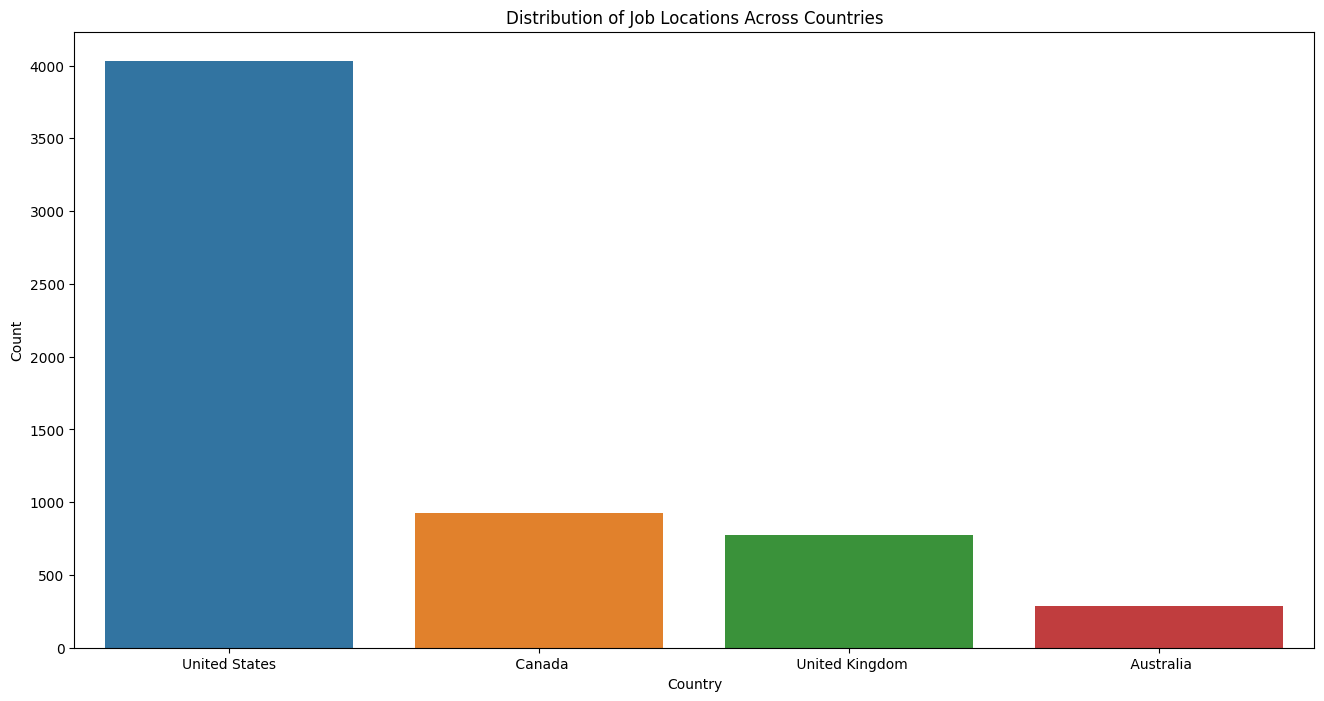

In [9]:
# Plotting the distribution of job locations across countries
plt.figure(figsize=(16, 8))
sns.countplot(x='search_country', data=df, order=df['search_country'].value_counts().index)
plt.title('Distribution of Job Locations Across Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


**Can you provide a word cloud for job summaries to highlight frequently occurring terms?**

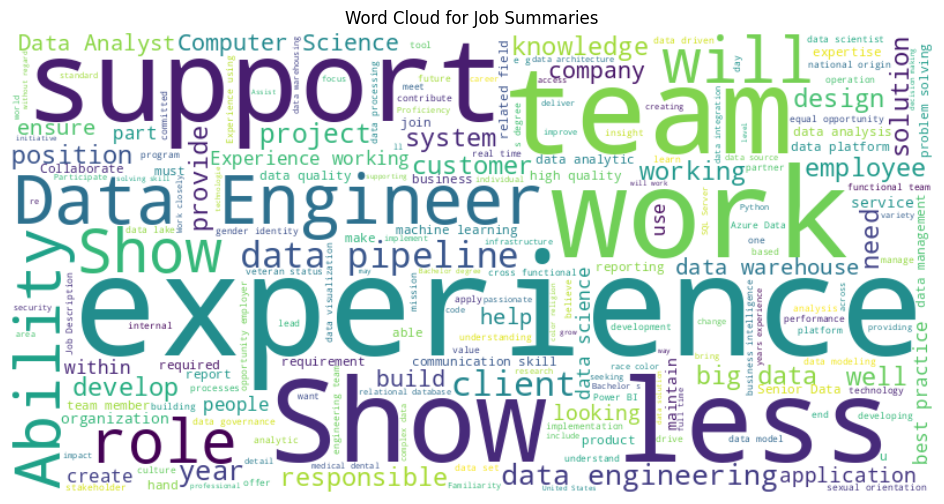

In [10]:
from wordcloud import WordCloud

# Generating a word cloud for job summaries
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['job_summary'].dropna()))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Summaries')
plt.show()


**What are the most common words used in job summaries?**

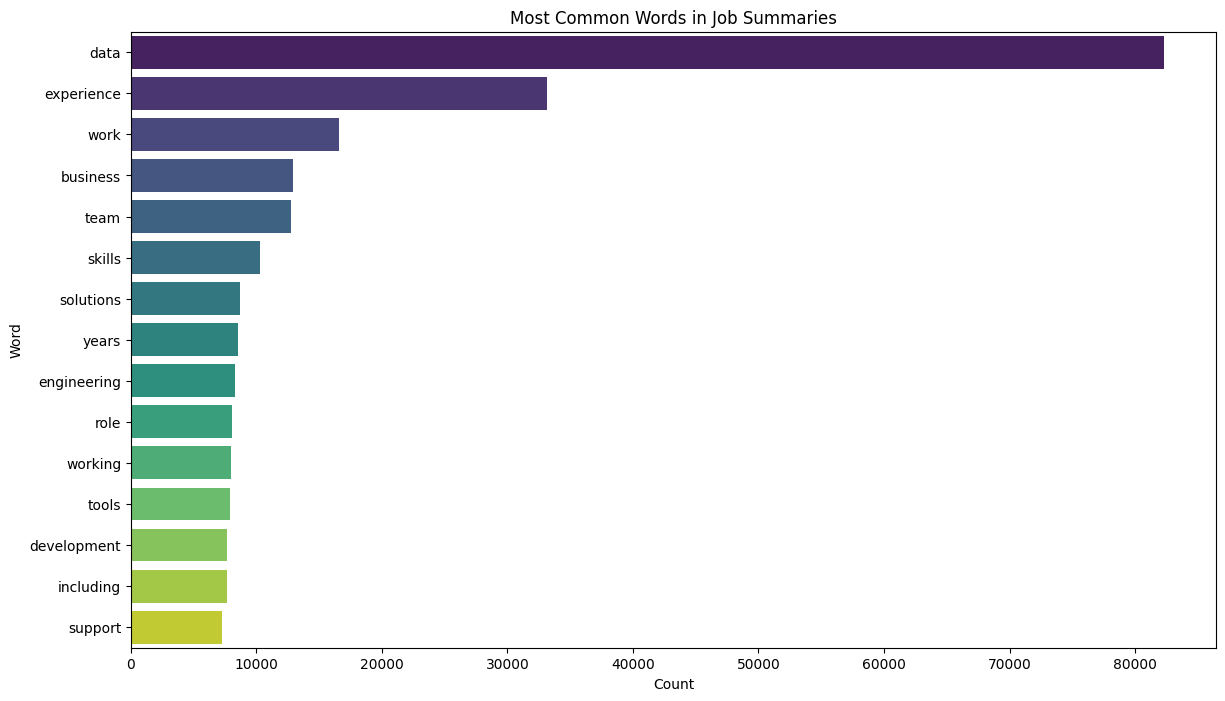

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating a bag-of-words model for job summaries
vectorizer = CountVectorizer(stop_words='english', max_features=100)
job_summary_bow = vectorizer.fit_transform(df['job_summary'].dropna())

# Extracting feature names and their counts
feature_names = vectorizer.get_feature_names_out()
word_counts = job_summary_bow.sum(axis=0).A1

# Creating a DataFrame for the most common words
common_words_df = pd.DataFrame({'Word': feature_names, 'Count': word_counts}).sort_values(by='Count', ascending=False).head(15)

# Plotting the most common words
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')
plt.title('Most Common Words in Job Summaries')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()


**How is the distribution of job types in different countries?**

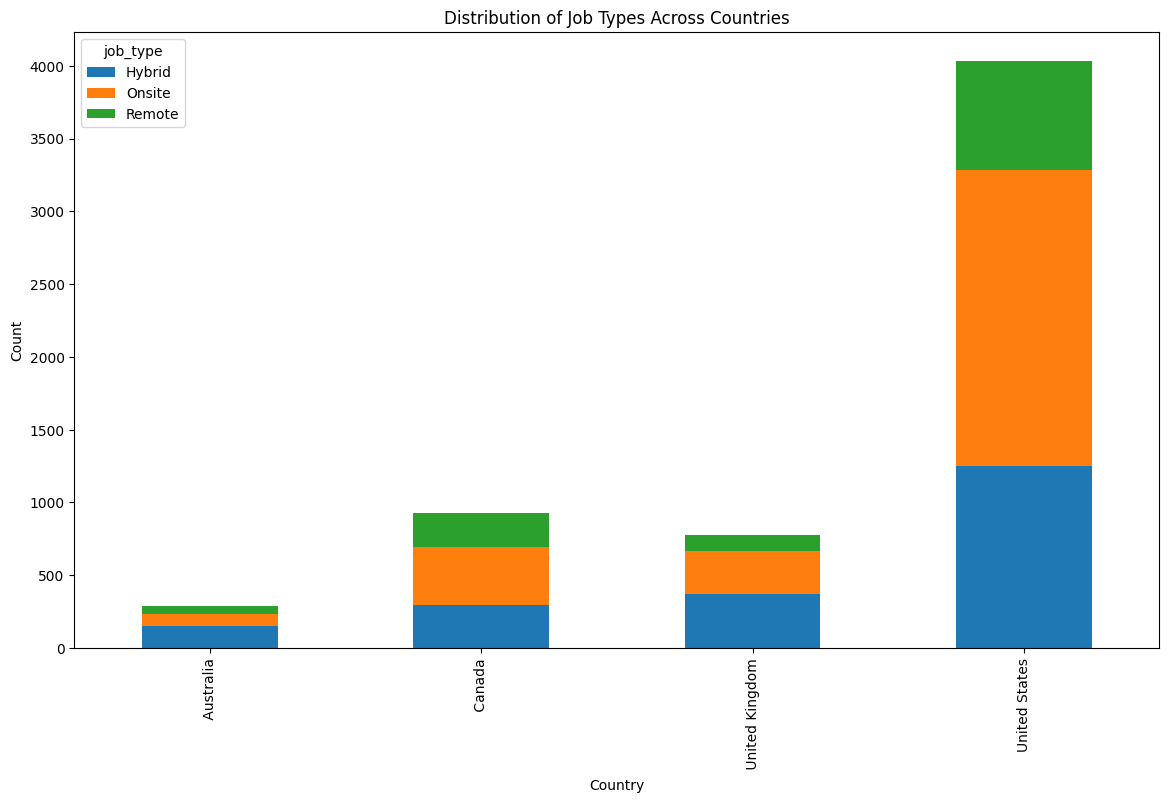

In [12]:
# Creating a stacked bar plot for job types across countries
job_type_by_country = df.groupby(['search_country', 'job_type']).size().unstack()
job_type_by_country.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Distribution of Job Types Across Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


**What is the distribution of job postings based on the job summary character length?**

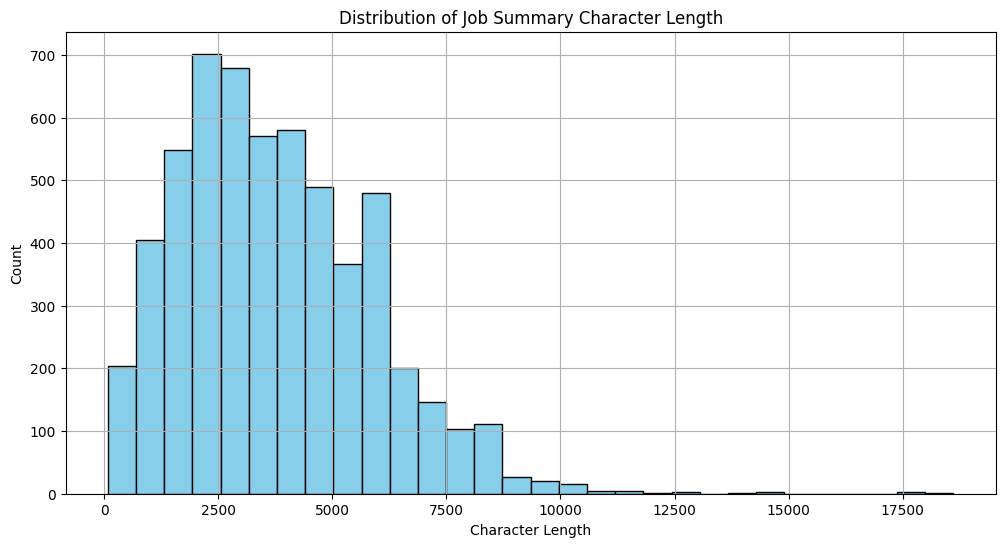

In [13]:
# Creating a histogram for job summary character length
plt.figure(figsize=(12, 6))
df['job_summary'].str.len().hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Job Summary Character Length')
plt.xlabel('Character Length')
plt.ylabel('Count')
plt.show()


**Can you analyze the most common job titles for each company?**

In [14]:
# Finding the most common job titles for each company
common_job_titles_by_company = df.groupby('company')['job_title'].apply(lambda x: x.mode().iloc[0])
common_job_titles_by_company = common_job_titles_by_company.sort_values(ascending=False).head(10)

# Displaying the most common job titles by company
common_job_titles_by_company


company
The Randy Neuringer Co., LLC.                                                           senior data software engineer
Percheron, LLC                                                                                      sUAS Data Analyst
HireMeFast LLC - Career Accelerator - Land A Job                                                 junior Data Engineer
Princeton IT Services, Inc                                                                           jr Data Engineer
The Placement Gurus                                                                      eCommerce Sales Data Analyst
Trilogy Health Services, LLC                                                          Workforce Planning Data Analyst
Swi-tch                                                                                              WMS Data Analyst
Software People Inc.                                                Voice/Data Communications Engineer/Design Spec...
All Native Group, The Federal Services Division 

**What are the most common cities for job postings in each country?**

In [15]:
# Finding the most common cities for job postings in each country
common_cities_by_country = df.groupby('search_country')['search_city'].apply(lambda x: x.mode().iloc[0])
common_cities_by_country


search_country
 Australia         New South Wales
 Canada                      Delta
 United Kingdom     Greater London
United States             Sterling
Name: search_city, dtype: object

**How does the length of job summaries vary for different job types?**

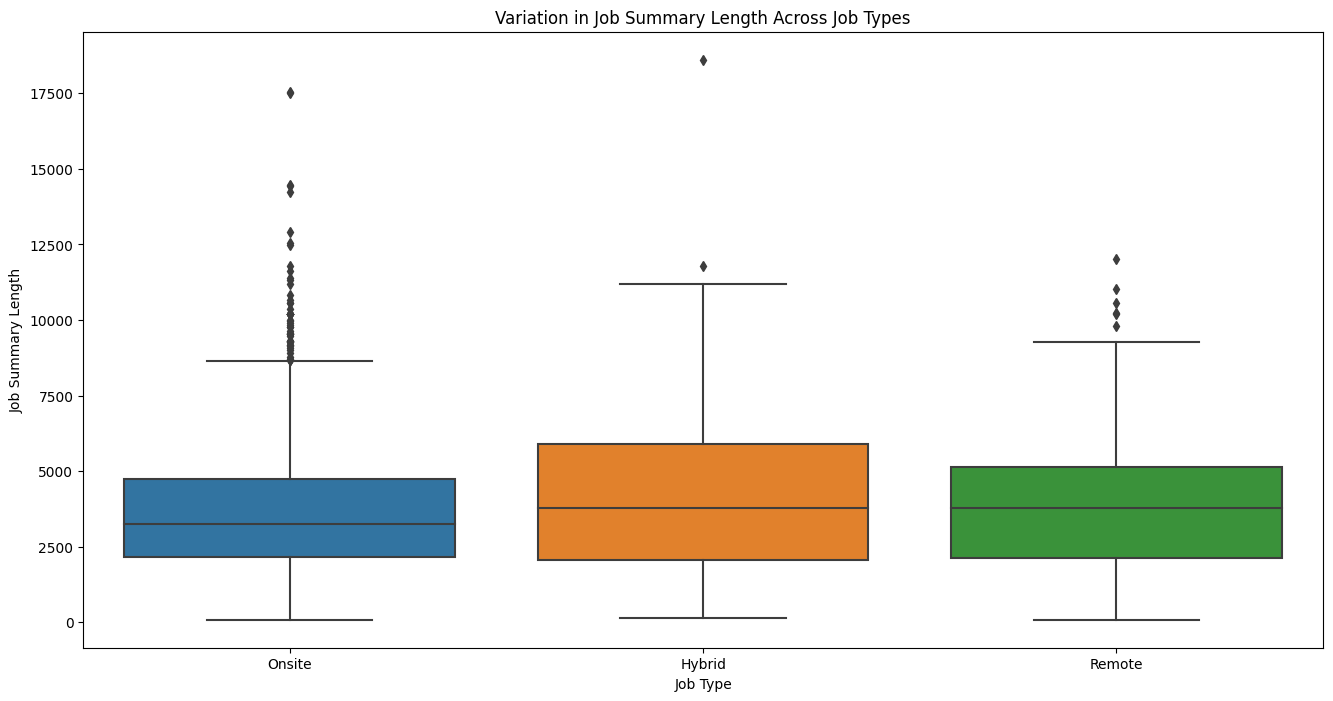

In [16]:
# Creating a box plot for job summary length by job type
df['job_summary_length'] = df['job_summary'].str.len()
plt.figure(figsize=(16, 8))
sns.boxplot(x='job_type', y='job_summary_length', data=df, order=df['job_type'].value_counts().index)
plt.title('Variation in Job Summary Length Across Job Types')
plt.xlabel('Job Type')
plt.ylabel('Job Summary Length')
plt.show()


**What are the top skills for each job title?**

In [17]:
# Extracting and counting skills for each job title
top_skills_by_title = df.groupby('job_title')['job_skills'].apply(lambda x: pd.Series(str(x).split(',')).value_counts().idxmax())
top_skills_by_title


job_title
(5461) Data Analyst                                                       Statistical Techniques
(5602) Data Engineer                                                    2791    Data Engineering
(Electronic Data Interchange) Data Analyst - Contract               1908    Oracle Cloud systems
(Full-time) Data and Reporting Analyst (SC)                                          5079    SQL
(Level III Database Engineer- ETL- SSIS, ADF, C#)                                     33    SSIS
                                                                          ...                   
eCommerce Sales Data Analyst                                               3269    Data Analysis
jr Data Engineer                                                                     328    Java
junior Data Engineer                                     3376    NaN\nName: junior Data Engineer
sUAS Data Analyst                                                                   639    LiDAR
senior data software

**What are the most common job titles for each job type?**

In [18]:
# Finding the most common job titles for each job type
common_job_titles_by_type = df.groupby('job_type')['job_title'].apply(lambda x: x.mode().iloc[0])
common_job_titles_by_type


job_type
Hybrid           Data Engineer
Onsite    Senior Data Engineer
Remote    Senior Data Engineer
Name: job_title, dtype: object

**What are the most common skills for each job type and job title combination?**

In [19]:
# Finding the most common skills for each job type and job title combination
common_skills_by_type_title = df.groupby(['job_type', 'job_title'])['job_skills'].apply(lambda x: pd.Series(str(x).split(',')).mode().iloc[0])
common_skills_by_type_title


job_type  job_title                                    
Hybrid    (5461) Data Analyst                                                         (5461) Data Analyst)
          (5602) Data Engineer                                                       (5602) Data Engineer)
          (Sr.) Lead Data Architect                                             (Sr.) Lead Data Architect)
          (USA) Senior, Data Engineer                                                         (USA) Senior
          26NOS - SysAd - Database Admin - Sr - (#109b)     26NOS - SysAd - Database Admin - Sr - (#109b))
                                                                                ...                       
Remote    Urgent Role - Cloud Data Analyst || Remote                               Power...\nName: (Remote
          Urgent Role - Senior Data Engineer || Remote                       Data Storag...\nName: (Remote
          Vector Database & Knowledge Graph Engineer           Vector Database & Knowled

**Average Job Summary Length by Job Type**

In [20]:
# Calculate the average job summary length for each job type
average_summary_length_by_type = df.groupby('job_type')['job_summary_length'].mean()
average_summary_length_by_type


job_type
Hybrid    3935.469377
Onsite    3633.028742
Remote    3774.794872
Name: job_summary_length, dtype: float64

**Job Type Distribution by Country**

In [21]:
# Display the job type distribution for each country
job_type_distribution_by_country = df.groupby('search_country')['job_type'].value_counts().unstack()
job_type_distribution_by_country


job_type,Hybrid,Onsite,Remote
search_country,,,
Australia,148,84,56
Canada,294,402,233
United Kingdom,369,298,110
United States,1250,2033,748


**Job Type Distribution by Search City**

In [22]:
# Display the job type distribution for each search city
job_type_distribution_by_city = df.groupby('search_city')['job_type'].value_counts().unstack()
job_type_distribution_by_city


job_type,Hybrid,Onsite,Remote
search_city,,,
Aberdeen,2.0,2.0,NaN
Abingdon,NaN,1.0,NaN
Abington,7.0,12.0,4.0
Aiken,NaN,1.0,1.0
Alabama,8.0,12.0,7.0
...,...,...,...
Wyandotte,NaN,3.0,NaN
Yarmouth,NaN,7.0,NaN
Yellowknife,NaN,1.0,NaN


**Descriptive Statistics for Job Summary Length**

In [23]:
# Display descriptive statistics for job summary length
summary_length_statistics = df['job_summary_length'].describe()
summary_length_statistics


count     5665.000000
mean      3761.472021
std       2101.424951
min         85.000000
25%       2117.000000
50%       3497.000000
75%       5138.000000
max      18610.000000
Name: job_summary_length, dtype: float64

**What is the average job summary length for each job type?**

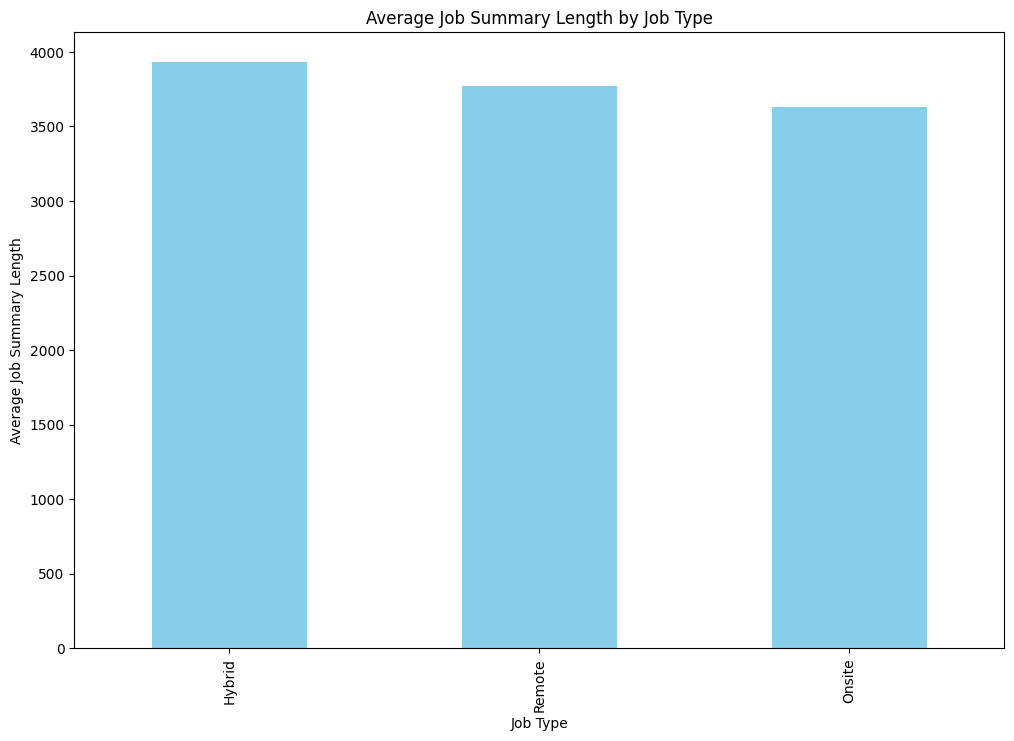

In [24]:
# Creating a bar chart for average job summary length by job type
average_summary_length_by_type = df.groupby('job_type')['job_summary_length'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
average_summary_length_by_type.plot(kind='bar', color='skyblue')
plt.title('Average Job Summary Length by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Average Job Summary Length')
plt.show()


**What is the distribution of job types in different search cities?**

In [25]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.bar(df, x='search_city', color='job_type', category_orders={'search_city': df['search_city'].value_counts().index, 'job_type': df['job_type'].value_counts().index})
fig.update_layout(
    title='Distribution of Job Types Across Search Cities',
    xaxis=dict(title='Search City'),
    yaxis=dict(title='Count'),
    legend=dict(title='Job Type', x=1.05, y=1, traceorder='normal', orientation='h'),
    xaxis_tickangle=-45,
    width=1000,
    height=1000
)
fig.show()
